In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import math
import os

In [2]:
# COLOR_A = '#1b065e'
# COLOR_A_ACCENT = '#87f5fb'
# COLOR_B = '#da3c43'
# COLOR_B_ACCENT = '#efbcd5'

# COLOR_A_ACCENT = '#1a3a3a'
# COLOR_A = '#6c9a8b'
# COLOR_B_ACCENT = '#77181c'
# COLOR_B = '#DA3C43'

# COLOR_A = '#7e8fa1'
# COLOR_A_ACCENT = '#afc2d4'
# COLOR_B = '#a4793d'
# COLOR_B_ACCENT = '#dfba5f'

COLOR_DARK_PETROL = '#0E7C7B'
COLOR_MEDIUM_PETROL = '#5bcfb6'
COLOR_LIGHT_PETROL = '#AFD5BF'

COLOR_DARK_VIOLET = '#63458a'
COLOR_MEDIUM_VIOLET = '#9066c4'
COLOR_LIGHT_VIOLET = '#aca2da'

COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
#COLOR_MEDIUM_RED = '#ff875c'
COLOR_LIGHT_RED = '#FFA359'

PALETTE_CONTRAST = [COLOR_DARK_PETROL, COLOR_MEDIUM_PETROL, COLOR_LIGHT_PETROL]
PALETTE_CONTRAST_SIMPLE = [COLOR_DARK_PETROL, COLOR_LIGHT_PETROL]

PALETTE_CONTRAST2 = [COLOR_DARK_VIOLET, COLOR_MEDIUM_VIOLET, COLOR_LIGHT_VIOLET]
PALETTE_CONTRAST2_SIMPLE = [COLOR_DARK_VIOLET, COLOR_LIGHT_VIOLET]

PALETTE_REDS = [COLOR_HEIDENELKE, COLOR_GLUTROT, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_HEIDENELKE, COLOR_GLUTROT]

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

In [3]:
PATH = "../data/2802_all_and_fullscreens"
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [4]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [5]:
data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = "-1"
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.program_fwrunning == 'windup_fullscreen_True', 'program_fwrunning'] = 'windup_True'
data.loc[data.program_fwrunning == 'windup_fullscreen_False', 'program_fwrunning'] = 'windup_False'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_5160\204886291.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fw == -0.001, 'fw'] = "-1"


In [6]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()
data_fw_running_temp = data[data['fw_running'] == True]

error_dict = {}
for framework in framework_list:
    data_fw = data_fw_running_temp[data_fw_running_temp['framework'] == framework]
    
    data_fw_default = data_fw[data_fw['complexity'] == 'default']
    num_negative_diff_default = data_fw_default[data_fw_default['diff'] < 0].count().iloc[0]
    num_no_fw_default = data_fw_default[data_fw_default['fw'] == "-1"].count().iloc[0]
    total_default = data_fw_default.count().iloc[0]

    data_fw_rects = data_fw[data_fw['complexity'] == 'rects']
    num_negative_diff_rects = data_fw_rects[data_fw_rects['diff'] < 0].count().iloc[0]
    num_no_fw_rects = data_fw_rects[data_fw_rects['fw'] == "-1"].count().iloc[0]
    total_rects = data_fw_rects.count().iloc[0]

    total = data_fw.count().iloc[0]

    error_dict[framework] = {'negative_diffs_default': num_negative_diff_default,
                              'negative_diffs_rects': num_negative_diff_rects,
                              'total_diffs': num_negative_diff_default + num_negative_diff_rects,
                              'total': total,
                              'rel_error': (num_negative_diff_default + num_negative_diff_rects) / total ,
                            }

error_df = pd.DataFrame(error_dict).T
error_df = error_df.sort_values('total_diffs', ascending=False)
error_df

,negative_diffs_default,negative_diffs_rects,total_diffs,total,rel_error
DirectX11,293.0,359.0,652.0,2928.0,0.222678
pygame,298.0,14.0,312.0,3587.0,0.086981
glumpy_qt5,13.0,200.0,213.0,2400.0,0.088750
glumpy_sdl,1.0,200.0,201.0,2400.0,0.083750
glumpy_pyglet,200.0,0.0,200.0,2400.0,0.083333
win32,78.0,2.0,80.0,2400.0,0.033333
Unity,34.0,27.0,61.0,1600.0,0.038125
Java2D,2.0,1.0,3.0,2400.0,0.001250
psychopy_pyglet,1.0,0.0,1.0,3517.0,0.000284
SDL2_OpenGL,0.0,1.0,1.0,3600.0,0.000278


In [7]:
data_missing_fw = data_fw_running_temp[data_fw_running_temp['fw'] == "-1"]
data_missing_fw['unique_options'] = data_missing_fw['framework'].astype(str) + '-' + data_missing_fw['complexity'].astype(str) + '-' + data_missing_fw['fullscreen'].astype(str) + '-' + data_missing_fw['fullscreen_mode'].astype(str) + '-' + data_missing_fw['program'].astype(str)

missings = []
for combi in data_missing_fw['unique_options'].unique():
    missings.append(combi.split('-'))
df_missings = pd.DataFrame(missings)
df_missings.columns = ['framework', 'complexity', 'fullscreen', 'fullscreen_mode', 'program']

data_fw_running = data_fw_running_temp[data_fw_running_temp['fw'] != "-1"]
df_missings

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_5160\4241667832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_fw['unique_options'] = data_missing_fw['framework'].astype(str) + '-' + data_missing_fw['complexity'].astype(str) + '-' + data_missing_fw['fullscreen'].astype(str) + '-' + data_missing_fw['fullscreen_mode'].astype(str) + '-' + data_missing_fw['program'].astype(str)


,framework,complexity,fullscreen,fullscreen_mode,program
0,DirectX11,default,True,2.0,bitblt
1,DirectX11,default,True,2.0,getdbits
2,DirectX11,default,True,2.0,getpixel
3,DirectX11,default,True,2.0,windup
4,GLEW_SDL,default,True,3.0,bitblt
5,GLEW_SDL,default,False,3.0,bitblt
6,GLEW_SDL,default,True,3.0,getdbits
7,GLEW_SDL,default,False,3.0,getdbits
8,GLEW_SDL,default,True,3.0,getpixel
9,GLEW_SDL,default,False,3.0,getpixel


# E2E Latency

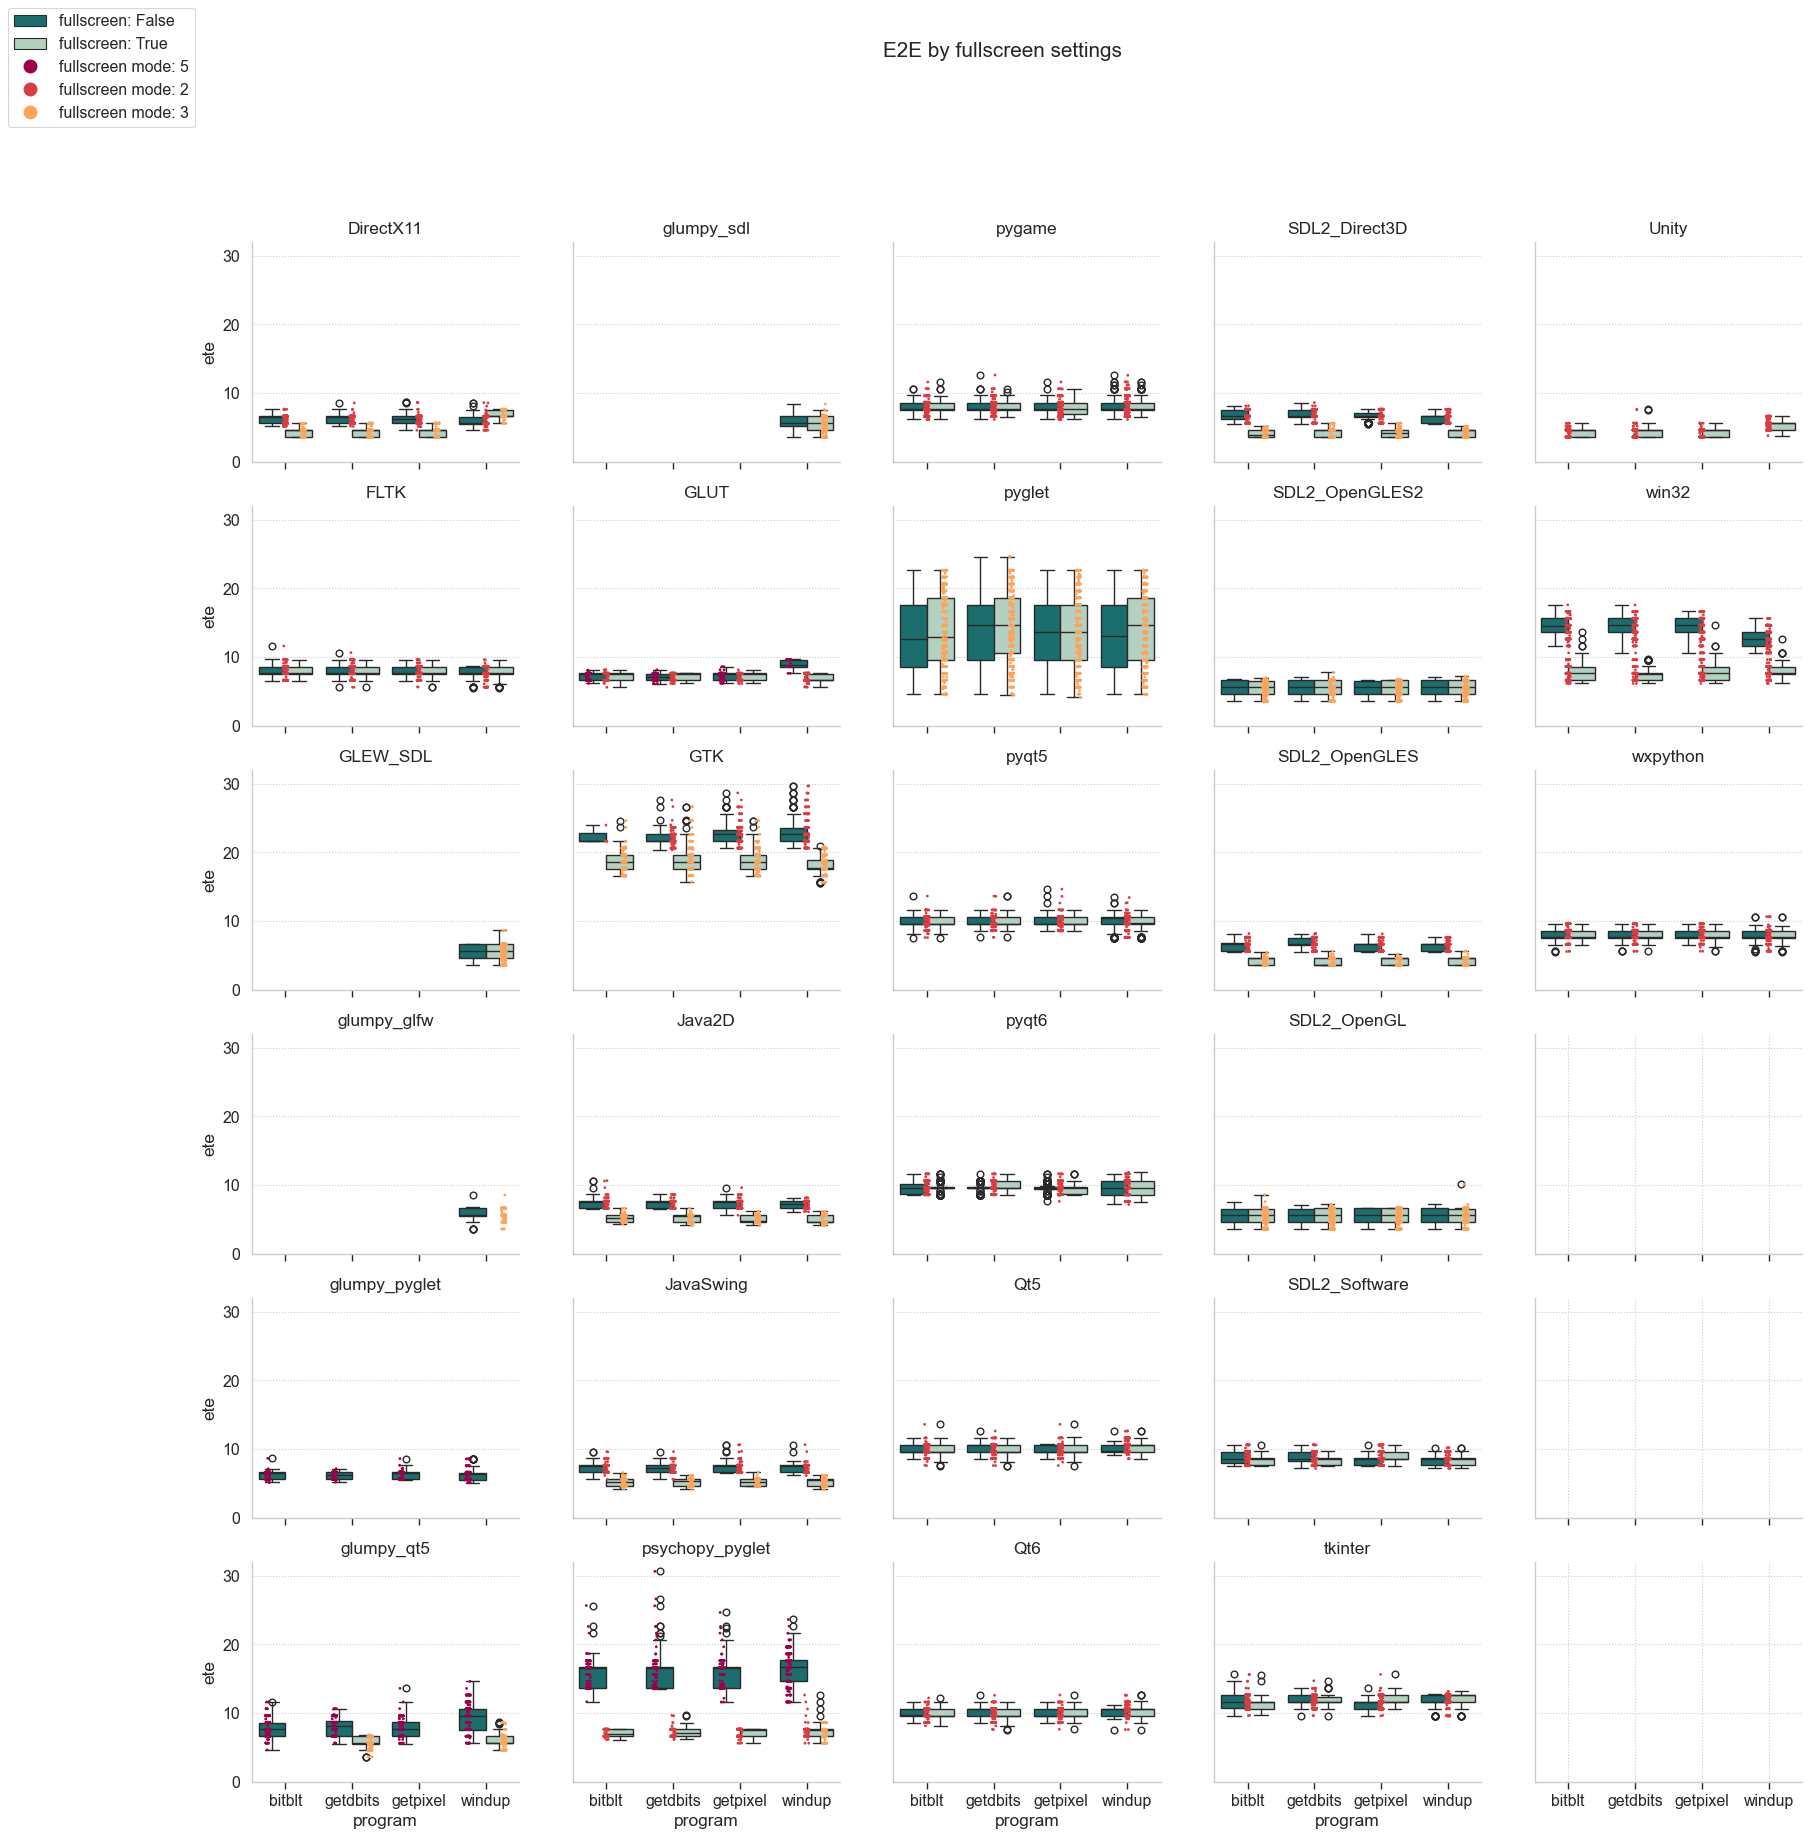

In [8]:
fig, axes = plt.subplots(sqrt, sqrt-1, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("E2E by fullscreen settings")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == framework))], x='program', y='ete', hue='fullscreen', hue_order=[False, True], palette=PALETTE_CONTRAST_SIMPLE, dodge=True)
    sns.stripplot(ax=axes[x, y], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == framework))], x='program', y='ete', hue='fullscreen_mode', hue_order=[5, 2, 3], palette=PALETTE_REDS, dodge=True, size=2)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 32)
    try:
        axes[x, y].get_legend().set_visible(False)
    except:
        pass

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['fullscreen: ' + labels[0], 'fullscreen: ' + labels[1], 'fullscreen mode: ' + labels[2], 'fullscreen mode: ' + labels[3], 'fullscreen mode: ' + labels[4]], markerscale=5., loc='upper left')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_5160\700755489.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


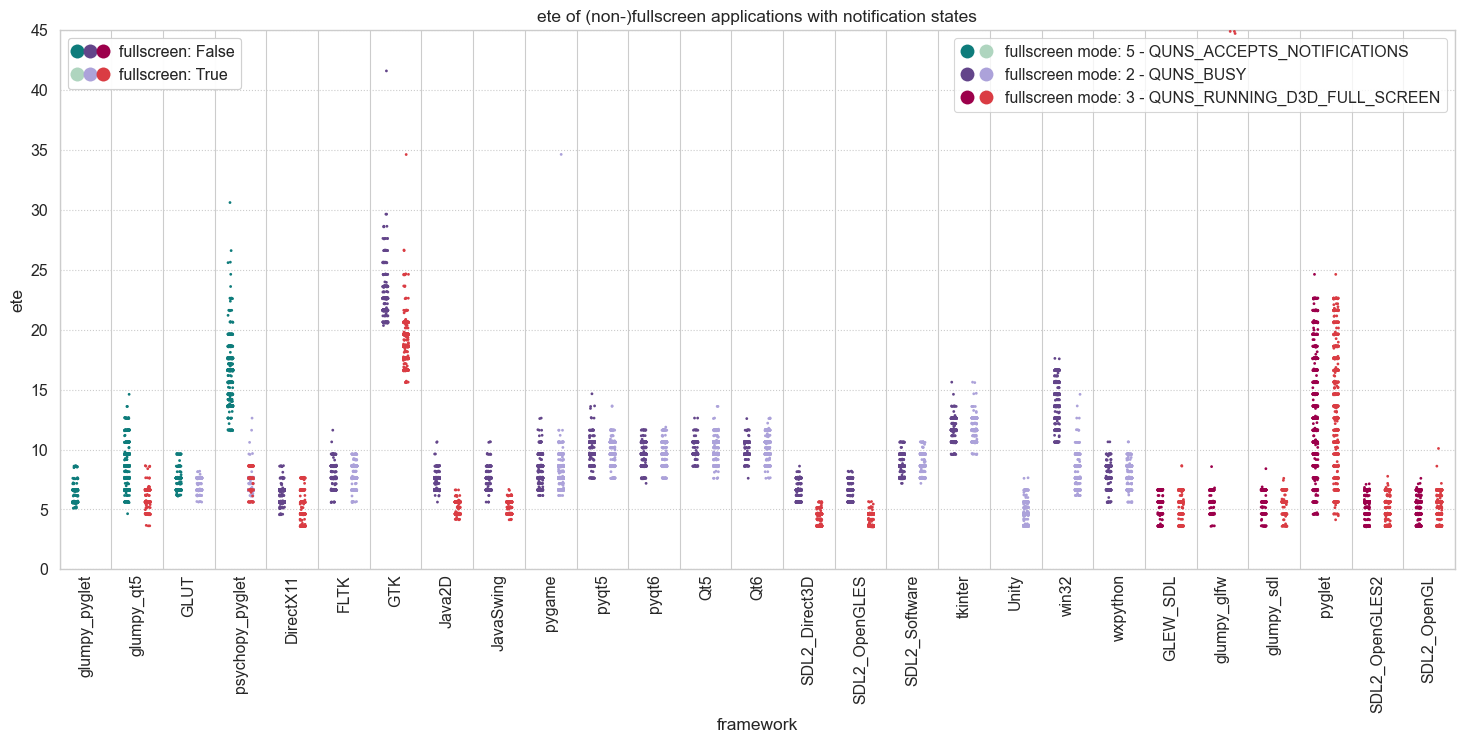

In [9]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['fullscreen_mode'] == 5))], x='framework', y='ete', hue='fullscreen', palette=PALETTE_CONTRAST_SIMPLE, hue_order=[False, True], dodge=True, size=2)
plot = sns.stripplot(data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['fullscreen_mode'] == 2))], x='framework', y='ete', hue='fullscreen', palette=PALETTE_CONTRAST2_SIMPLE, hue_order=[False, True], dodge=True, size=2)
plot = sns.stripplot(data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['fullscreen_mode'] == 3))], x='framework', y='ete', hue='fullscreen', palette=PALETTE_REDS_SIMPLE, hue_order=[False, True], dodge=True, size=2)

handles, labels = plot.get_legend_handles_labels()
handles_combined_mode = [(handles[0], handles[1]), (handles[2], handles[3]), (handles[4], handles[5])]
mode_legend = plot.legend(handles_combined_mode, ['fullscreen mode: 5 - QUNS_ACCEPTS_NOTIFICATIONS', 'fullscreen mode: 2 - QUNS_BUSY', 'fullscreen mode: 3 - QUNS_RUNNING_D3D_FULL_SCREEN'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
handles_combined_fullscreen = [(handles[0], handles[2], handles[4]), (handles[1], handles[3], handles[5])]
fullscreen_legend = plot.legend(handles_combined_fullscreen, ['fullscreen: ' + labels[0], 'fullscreen: ' + labels[1]], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
plt.gca().add_artist(mode_legend)
plt.gca().add_artist(fullscreen_legend)

plot.set_title('ete of (non-)fullscreen applications with notification states')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 45)
plot.xaxis.set_minor_locator(AutoMinorLocator(2))
plot.grid(True, which='minor', axis='x', linestyle='-')
plot.tick_params(axis='x', which='both', length=0)

In [10]:
data_fw_not_running = data[data['fw_running'] == False]
data_cleared = pd.concat([data_fw_not_running, data_fw_running], axis=0)

data_fullscreens = data_cleared[data_cleared['fullscreen'] == True]
data_fw_running_fullscreens = data_fullscreens[data_fullscreens['fw_running'] == True]
data_fw_not_running_fullscreens = data_fullscreens[data_fullscreens['fw_running'] == False]

print(data_cleared.shape)
print(data_fullscreens.shape)
print(data_fw_running_fullscreens.shape)
print(data_fw_not_running_fullscreens.shape)

(122673, 14)
(83867, 14)
(41386, 14)
(42481, 14)


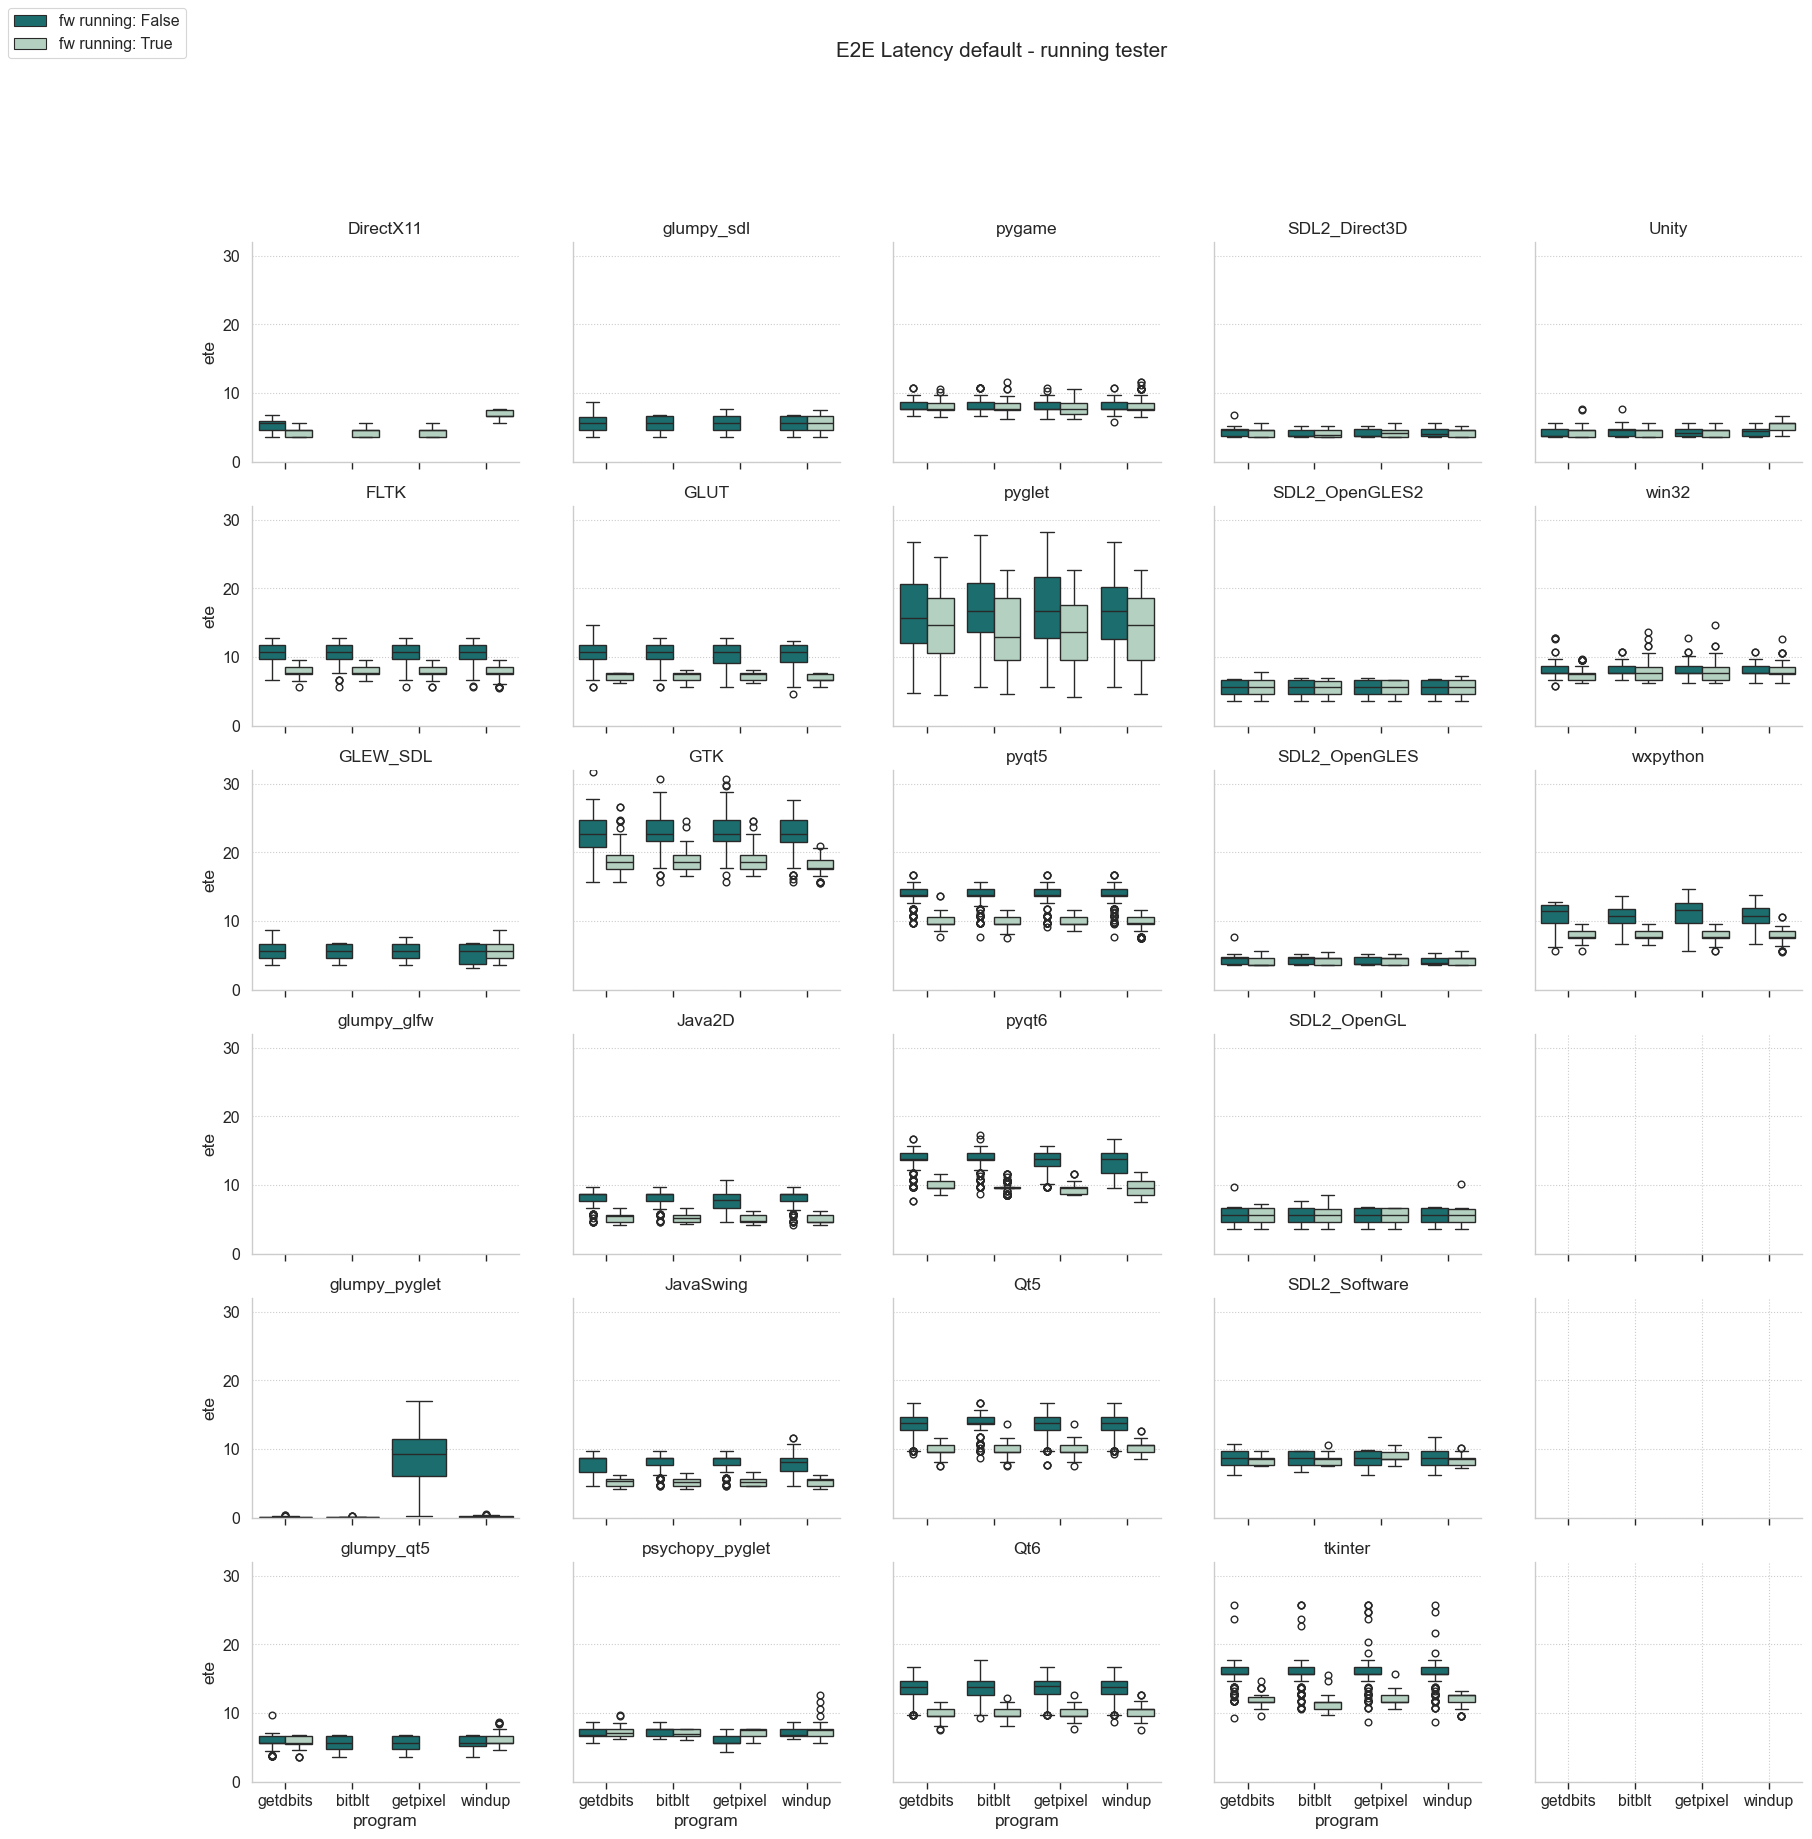

In [11]:
fig, axes = plt.subplots(sqrt, sqrt-1, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("E2E Latency default - running tester")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_fullscreens[((data_fullscreens['complexity'] == 'default') & (data_fullscreens['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=PALETTE_CONTRAST_SIMPLE)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 32)
    try:
        axes[x, y].get_legend().set_visible(False)
    except:
        pass

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left')
sns.despine(bottom = False, left = False)

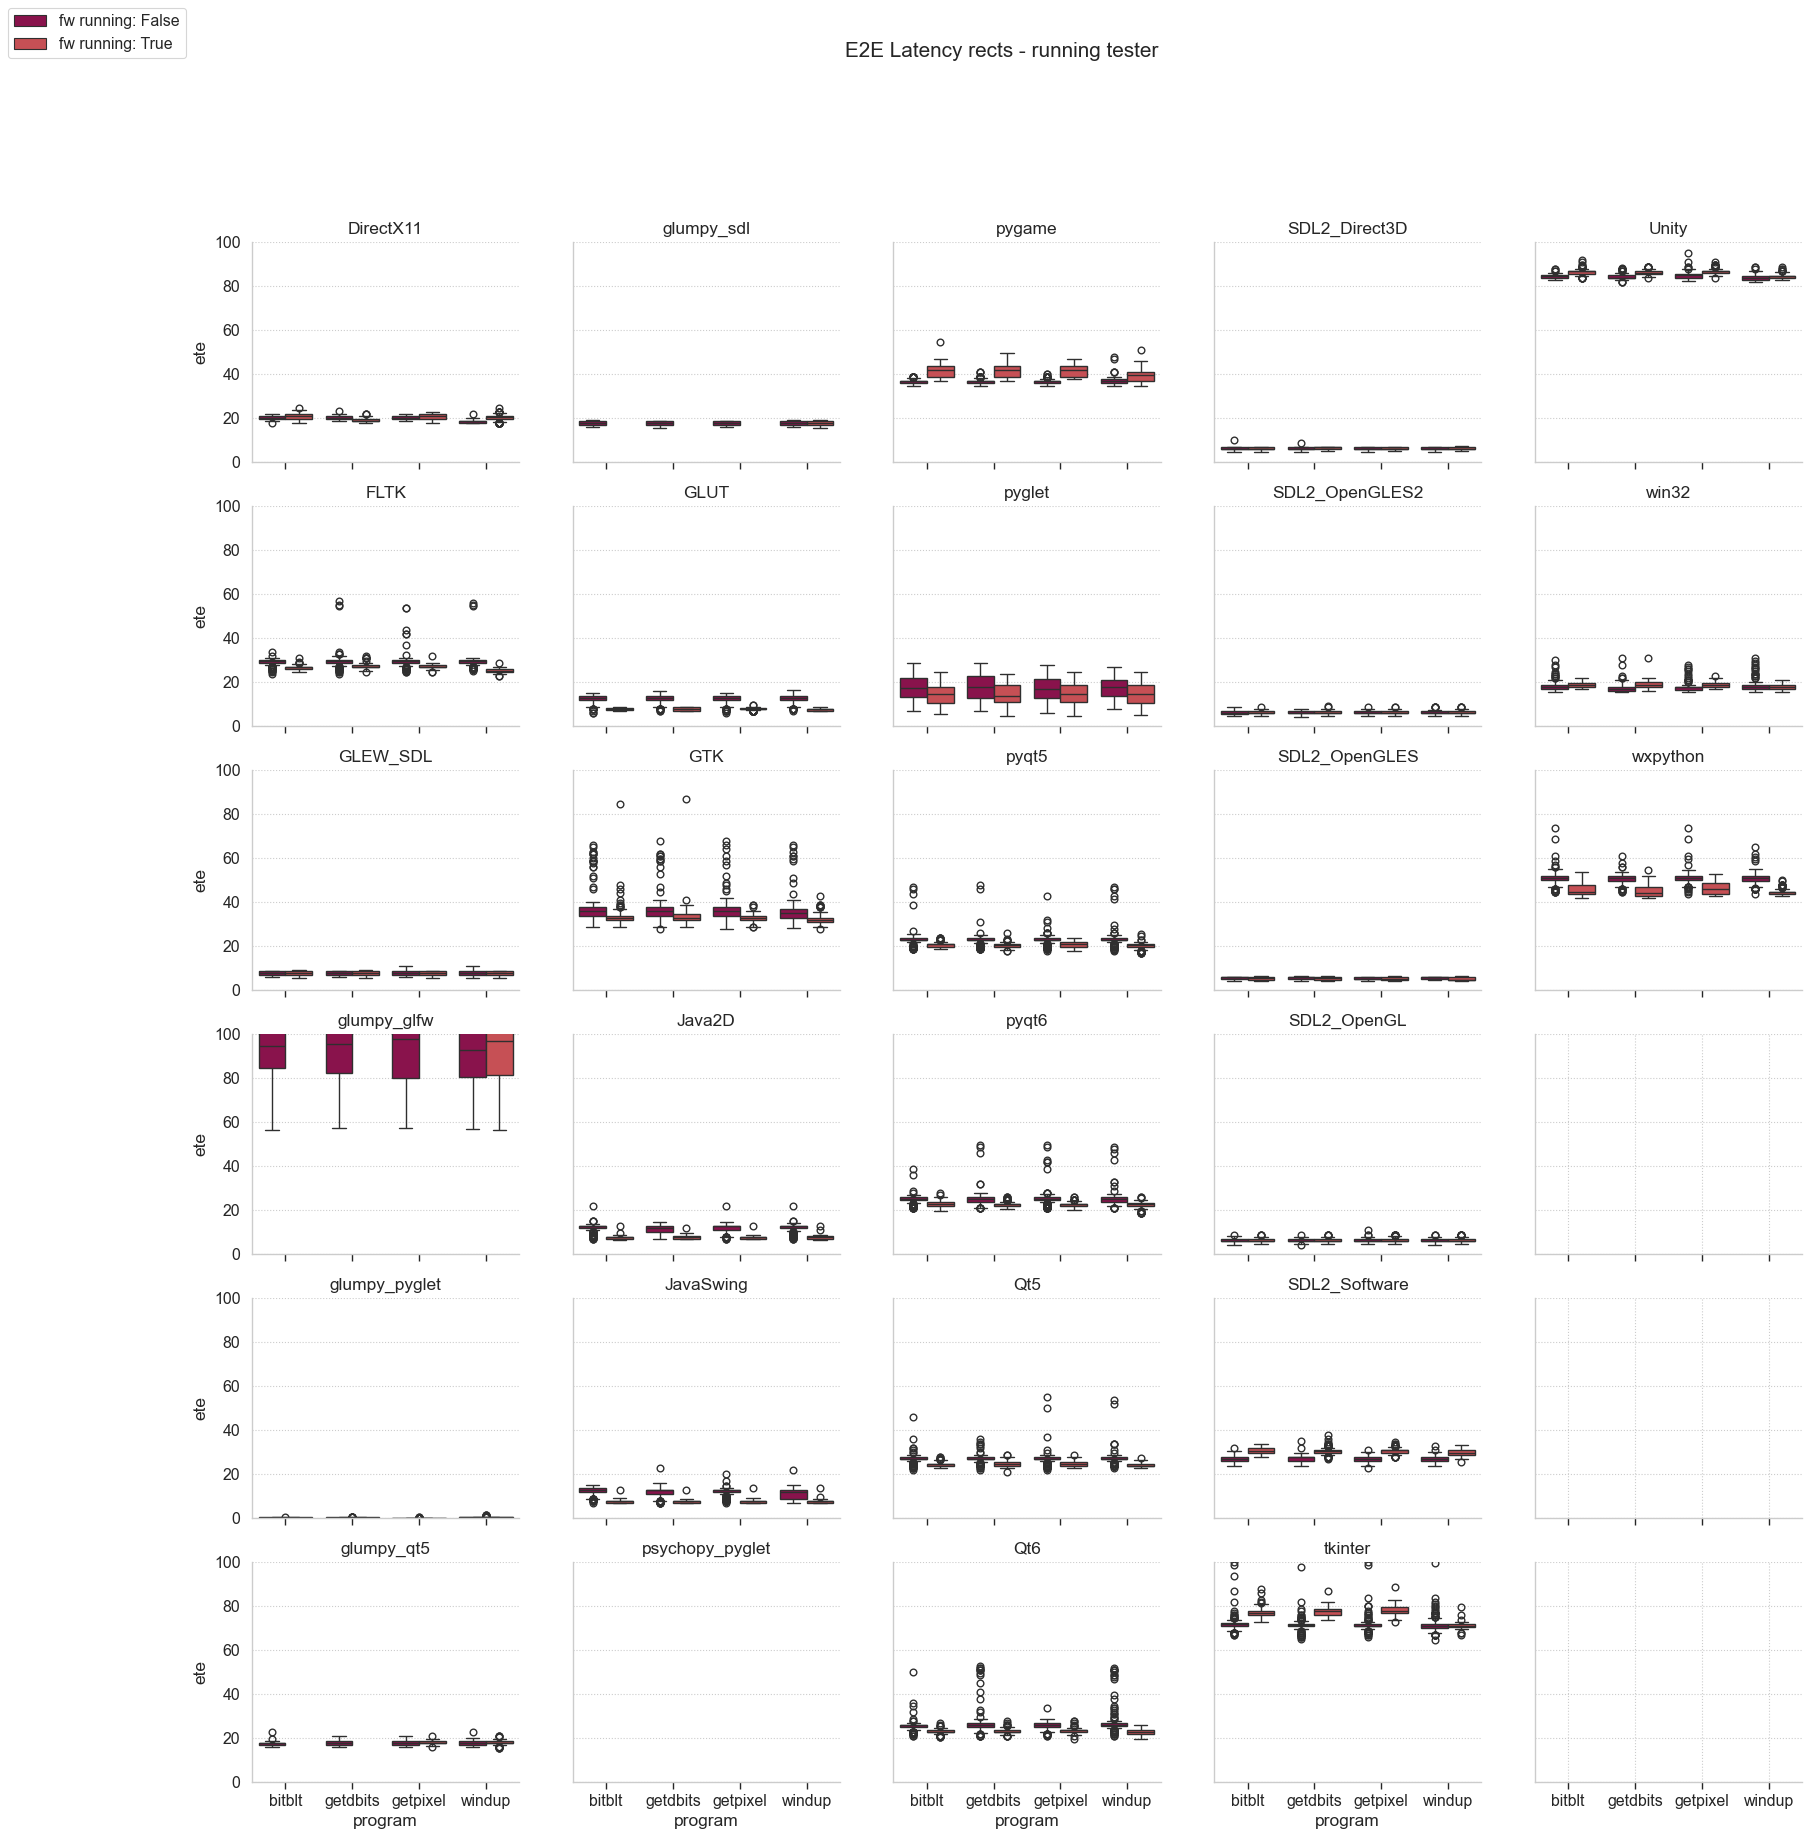

In [12]:
fig, axes = plt.subplots(sqrt, sqrt-1, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("E2E Latency rects - running tester")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_fullscreens[((data_fullscreens['complexity'] == 'rects') & (data_fullscreens['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=PALETTE_REDS_SIMPLE)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 100)
    try:
        axes[x, y].get_legend().set_visible(False)
    except:
        pass

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left')
sns.despine(bottom = False, left = False)

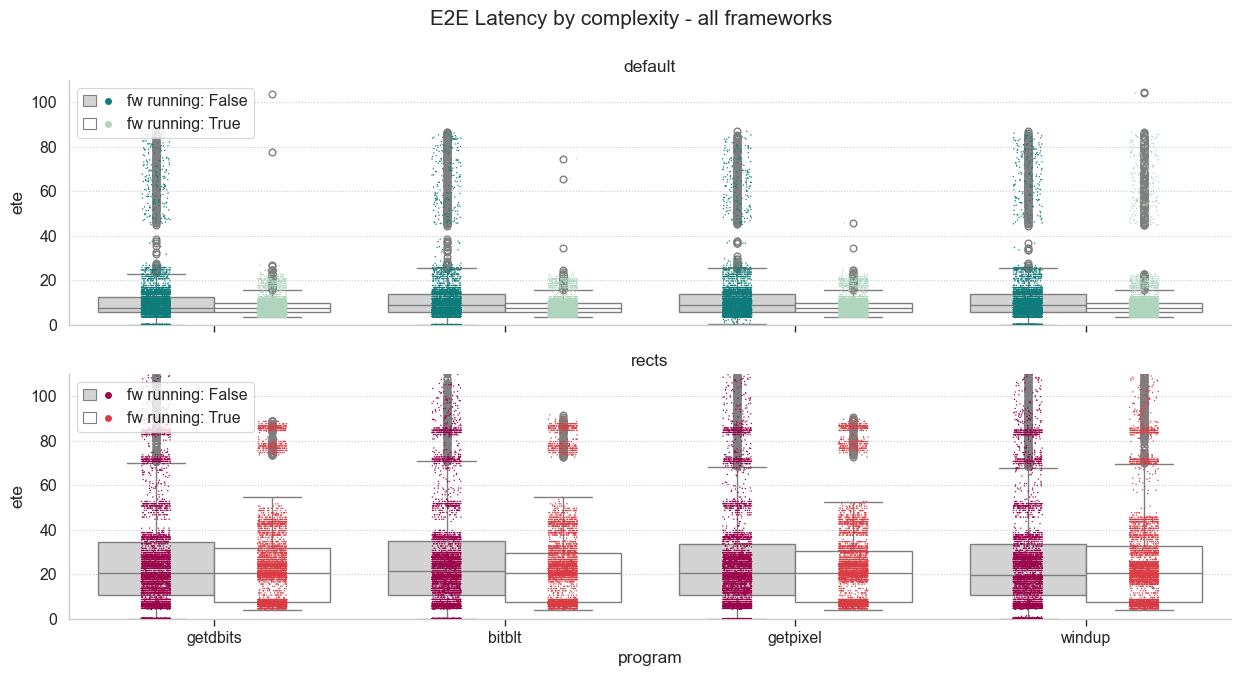

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle("E2E Latency by complexity - all frameworks")

sns.boxplot(ax=axes[0], data=data_fullscreens[data_fullscreens['complexity'] == 'default'], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=['lightgrey', 'white'])
sns.stripplot(ax=axes[0], data=data_fullscreens[data_fullscreens['complexity'] == 'default'], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette=PALETTE_CONTRAST_SIMPLE, size=1)
axes[0].set_title("default")
handles, labels = axes[0].get_legend_handles_labels()
handles_combined = [(handles[0], handles[2]), (handles[1], handles[3])]
axes[0].legend(handles_combined, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})

sns.boxplot(ax=axes[1], data=data_fullscreens[data_fullscreens['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=['lightgrey', 'white'])
sns.stripplot(ax=axes[1], data=data_fullscreens[data_fullscreens['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette=PALETTE_REDS_SIMPLE, size=1)
axes[1].set_title("rects")
handles, labels = axes[1].get_legend_handles_labels()
handles_combined = [(handles[0], handles[2]), (handles[1], handles[3])]
axes[1].legend(handles_combined, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})

axes[1].set_ylim(0, 110)
sns.despine(bottom = False, left = False)


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_5160\1964886333.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


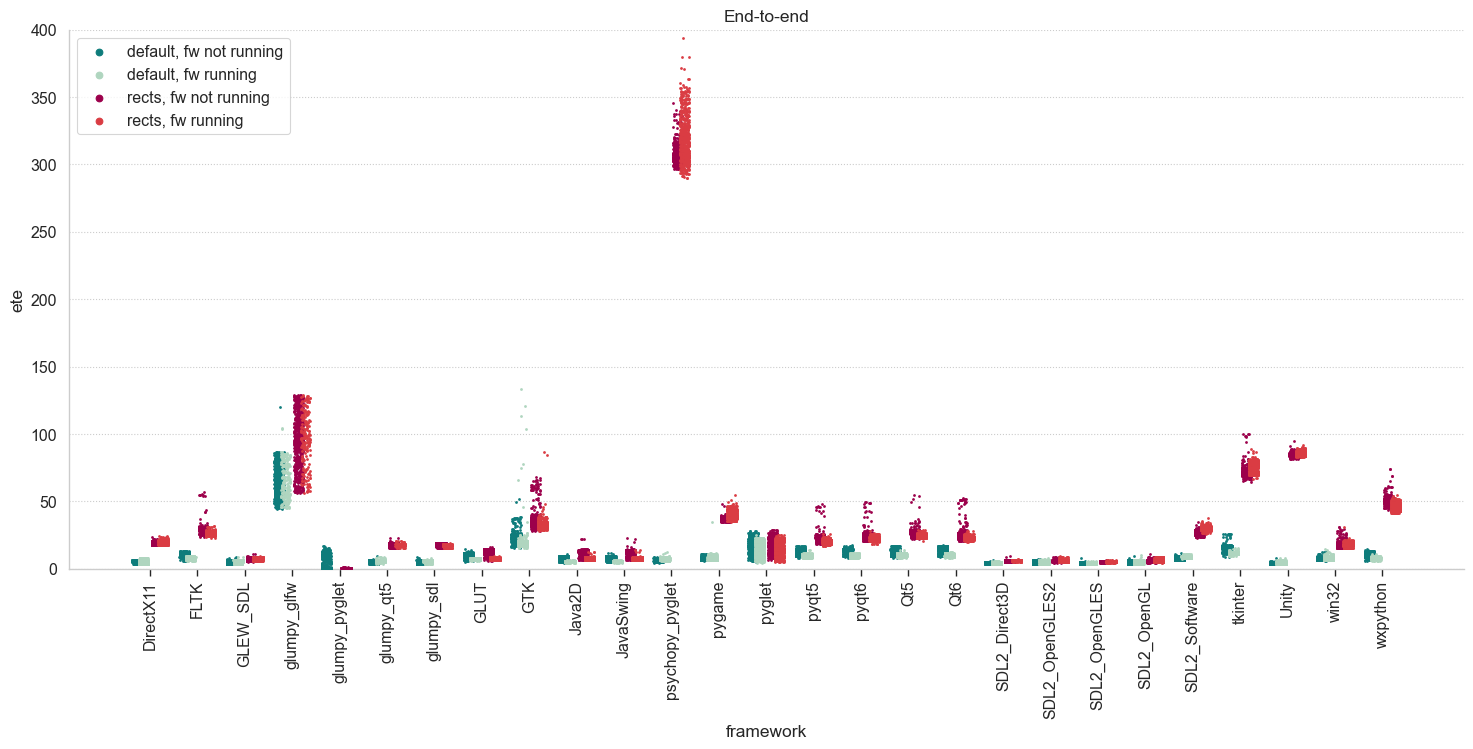

In [14]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_not_running_fullscreens[data_fw_not_running_fullscreens['complexity'] == 'default'], x='framework', y='ete', color=COLOR_DARK_PETROL, transform=offset(-0.2)+trans, size=2)
sns.stripplot(data=data_fw_running_fullscreens[data_fw_running_fullscreens['complexity'] == 'default'], x='framework', y='ete', color=COLOR_LIGHT_PETROL, transform=offset(-0.1)+trans, size=2, legend='auto')
sns.stripplot(data=data_fw_not_running_fullscreens[data_fw_not_running_fullscreens['complexity'] == 'rects'], x='framework', y='ete', color=COLOR_HEIDENELKE, transform=offset(0.1)+trans, size=2)
sns.stripplot(data=data_fw_running_fullscreens[data_fw_running_fullscreens['complexity'] == 'rects'], x='framework', y='ete', color=COLOR_GLUTROT, transform=offset(0.2)+trans, size=2)

dot_legend_default_not_running=plot.scatter(0, -100, color=COLOR_DARK_PETROL)
dot_legend_default_running=plot.scatter(0, -100, color=COLOR_LIGHT_PETROL)
dot_legend_rects_not_running=plot.scatter(0, -100, color=COLOR_HEIDENELKE)
dot_legend_rects_running=plot.scatter(0, -100, color=COLOR_GLUTROT)

plot.legend(
    (dot_legend_default_not_running,
        dot_legend_default_running,
        dot_legend_rects_not_running,
        dot_legend_rects_running),
    ('default, fw not running',
        'default, fw running',
        'rects, fw not running',
        'rects, fw running'),
    loc='upper left'
)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 400)
plot.set_title('End-to-end')
sns.despine(bottom = False, left = False)

# Framework Latency

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_5160\1320241929.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


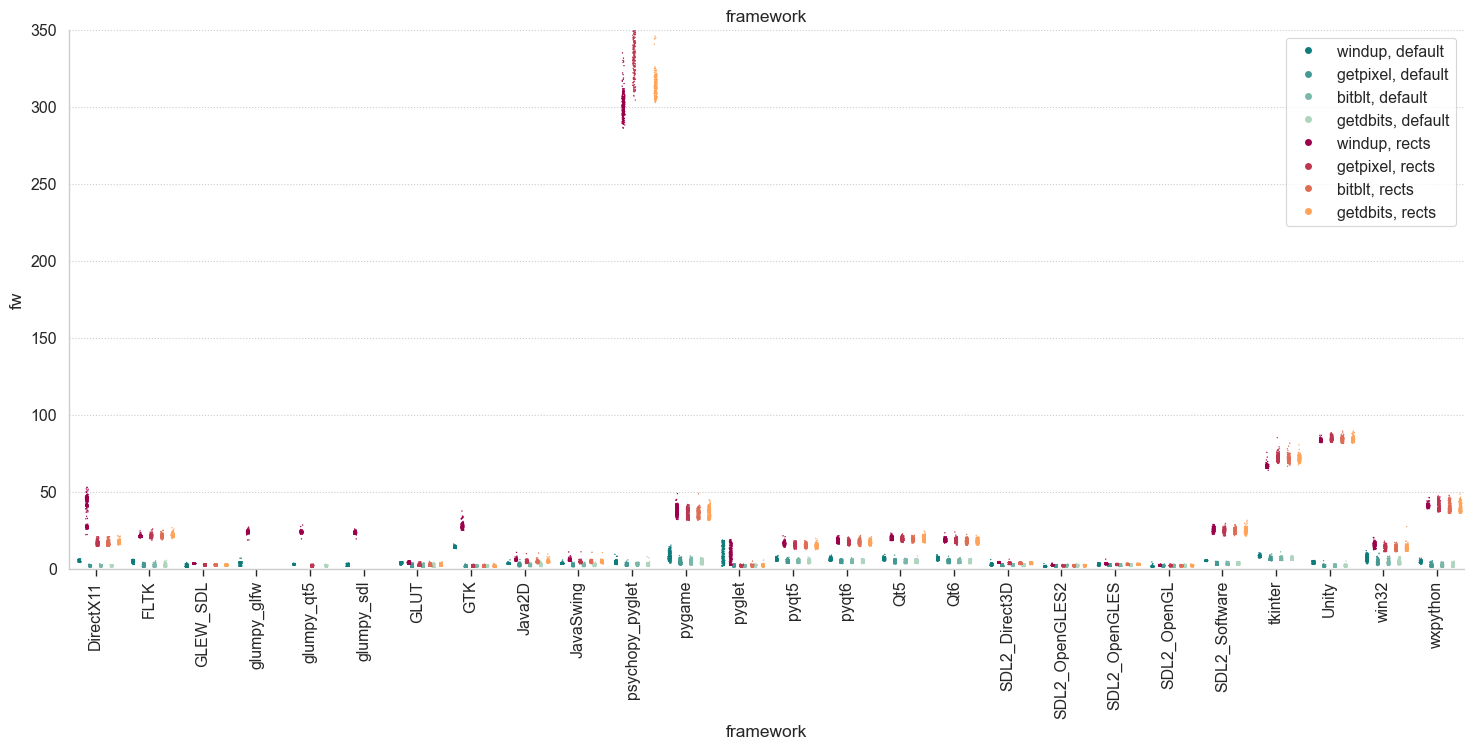

In [15]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_running_fullscreens[data_fw_running_fullscreens['complexity'] == 'default'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_DARK_PETROL},{COLOR_LIGHT_PETROL}', size=1)
sns.stripplot(data=data_fw_running_fullscreens[data_fw_running_fullscreens['complexity'] == 'rects'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_HEIDENELKE},{COLOR_LIGHT_RED}', transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 350)

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('framework')
sns.despine(bottom = False, left = False)

# Difference

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_5160\473429136.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


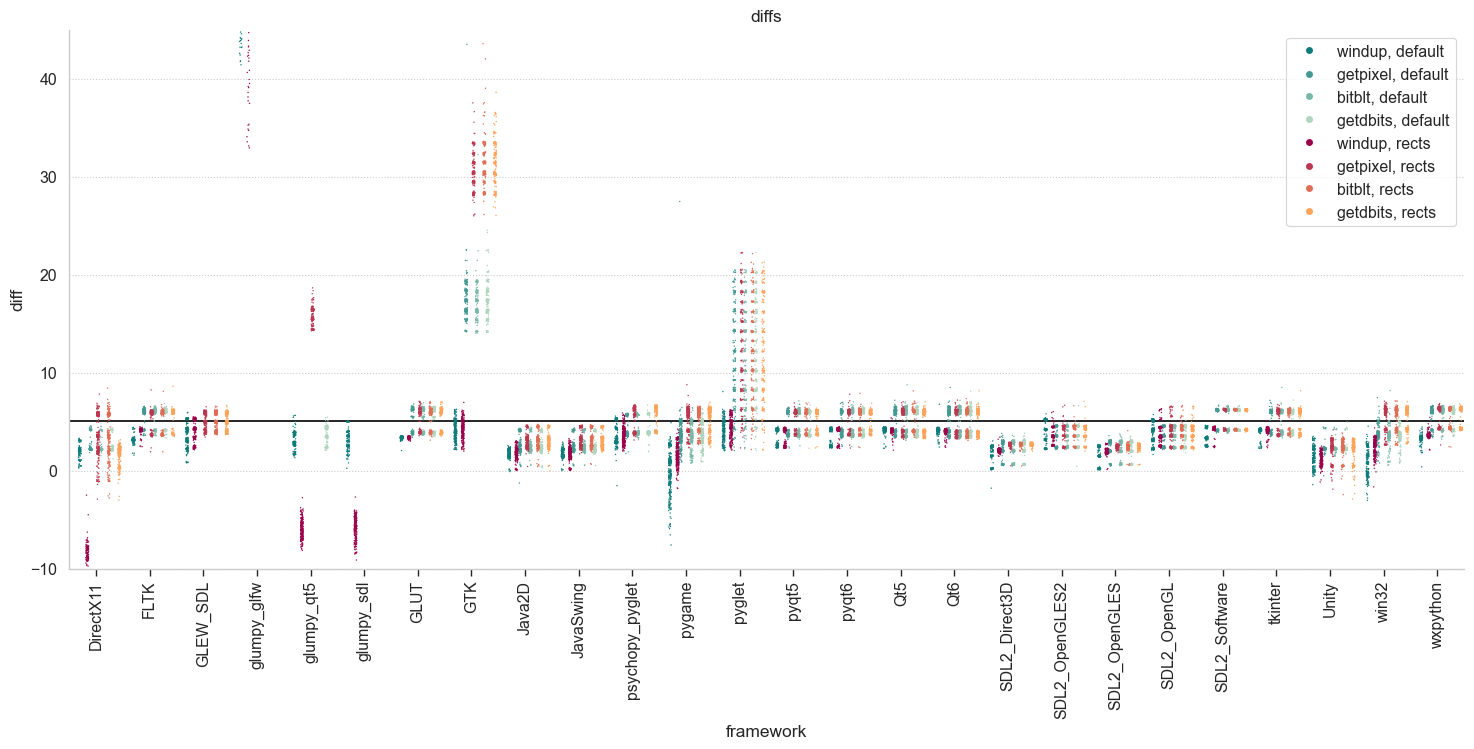

In [16]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_running_fullscreens[data_fw_running_fullscreens['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_DARK_PETROL},{COLOR_LIGHT_PETROL}', size=1)
sns.stripplot(data=data_fw_running_fullscreens[data_fw_running_fullscreens['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_HEIDENELKE},{COLOR_LIGHT_RED}', transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(-10, 45)

agg_mean = round(np.mean(diff_means), 1) / 1000
plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('diffs')
sns.despine(bottom = False, left = False)